# Data engineering workflow
1. Get a list of filenames (by extension)
2. For a given file: 
 * Import as a dataframe
 * Identify key columns: Coordinates, Hg value, units, groupings
 * Clean the data: handle missing values, identify outliers

In [1]:
#Import packages
import pandas as pd
import numpy as np
from pathlib import Path
import os

In [2]:
#Connect to GIS (via ArcGIS Pro)
from arcgis import GIS
gis = GIS('pro')

In [3]:
#Create a dictionary of file lists (by extension)
thePath = "../data/raw"
files = {}
for ext in ['csv','xlsx','dta']:
    files[ext] = [path for path in Path(thePath).rglob("*."+ext)]

In [4]:
#Process all CSV files
for the_file in files['csv']:
    #Get the filename (less the extension)
    file_name = os.path.basename(the_file).split(".")[0]
    print(the_file)

..\data\raw\cleaned_HGMAPS.csv
..\data\raw\FishAnalysisLagCategories_final.csv
..\data\raw\sediment_analysis_final.csv
..\data\raw\suspendedparticles_final.csv


## Data cleaning
* Get the filename
* Read the data into a dataframe
* Ensure data has coordinate fields
* Fix missing values
 * Omit rows with invalid X and Y coordinates

In [5]:
#Get the file to process
the_file = files['csv'][3]
print(the_file)

..\data\raw\suspendedparticles_final.csv


In [8]:
#Import the file into a dataframe
df = pd.read_csv(the_file,na_values='')
numrecs_df, numfields_df=df.shape
print(f'{numrecs_df} records with {numfields_df} fields imported')

77 records with 33 fields imported


### Get the columns

In [14]:
#Display a list of imported columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SiteCode     77 non-null     object 
 1   FieldCode    10 non-null     object 
 2   Community    77 non-null     object 
 3   CommCode     77 non-null     object 
 4   Location     77 non-null     int64  
 5   Point_Y      77 non-null     float64
 6   Point_X      77 non-null     float64
 7   Field1       0 non-null      float64
 8   location2    77 non-null     int64  
 9   SampleCode   76 non-null     object 
 10  Mainstem     76 non-null     float64
 11  TSS_1        77 non-null     float64
 12  TSS_2        70 non-null     float64
 13  TSS_3        27 non-null     float64
 14  TSS_avg      76 non-null     float64
 15  TSS_stdev    70 non-null     float64
 16  Hg_p_a       64 non-null     float64
 17  Hg_p_b       64 non-null     float64
 18  Hg_p_c       11 non-null     float64
 19  Hg_p_avg  

In [15]:
#Set the columns to use
x_fld = 'Point_X'
y_fld = 'Point_Y'
hg_fld = 'Hg_p_avg'
grp_fld = 'CommCode'

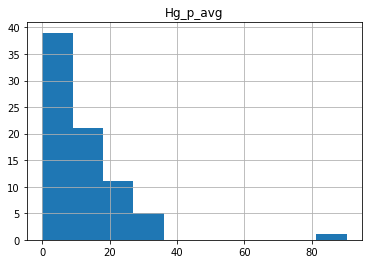

In [25]:
#Visualize histogram of HG values
df.hist(column = hg_fld);

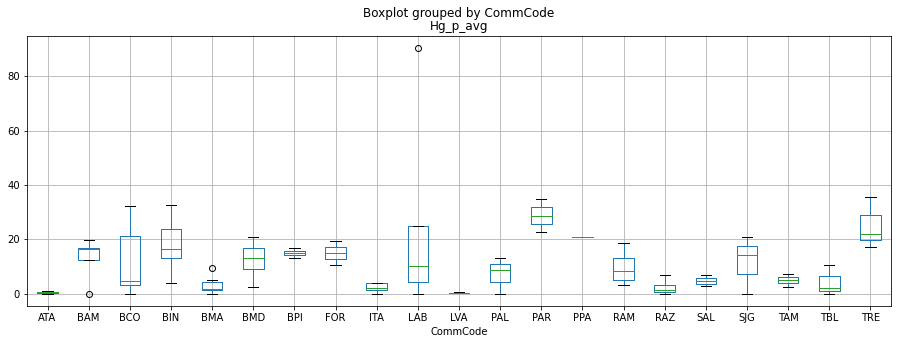

In [30]:
#Visualize distributions across groups
df.boxplot(column = hg_fld, by = grp_fld, figsize=(15,5));

In [19]:
#Convert to spatial dataframe
sdf = pd.DataFrame.spatial.from_xy(df,x_column=x_fld,y_column=y_fld)

In [33]:
#Create a map of the points
theMap = sdf.spatial.plot()

In [35]:
theMap

MapView(layout=Layout(height='400px', width='100%'))

In [34]:
theMap.basemap = 'satellite'